# Telco customer churn

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## import data sets

In [8]:
customer = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
customer.shape

(7043, 21)

## Clean Data

In [9]:
#check for NaN distribution
print(customer.info())
#ok seems no NaN found
length = len(customer)
#for those with object dtype check variation >.5
categorical_col = [ i for i in customer.dtypes.index if customer.dtypes[i] =='O']
print('We got %d categorical columns:'%(len(categorical_col)), categorical_col)
for col in categorical_col:
    print("%s :%d/%d"%(col,len(customer[col].unique()),length))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## Feature selection

In [10]:
#ok we got  customerID obviously useless for training but TotalCharges which should be tranform to numerical
customer = customer.drop(["customerID"], axis=1)
categorical_col.remove("Churn")
categorical_col.remove("customerID")
#can not directly convert TogtalCharges to float32 since it contains space!
#customer['TotalCharges'] = customer['TotalCharges'].astype("float64") <===Error
#Check out that there are some customers that their tenure is 0 but monthly charges is present
#guess that means they are new subscribers. 
#set those customer's TotalCharges to 0
customer.TotalCharges.loc[customer['TotalCharges'].str.isspace()] = 0
#then we can perform convert to float64
customer['TotalCharges'] = customer['TotalCharges'].astype("float64")

#fill these
#for i, tup in enumerate(customer['TotalCharges']):
#    try:
#        customer['TotalCharges'][i] = float(tup)
#    except ValueError:
#        #print("line:%d str:%s"%(i,tup))
#        customer['TotalCharges'][i] = float(0)
#print("finished")
#above tooks too much time
customer.head(10)

c:\users\sean\appdata\local\programs\python\python35\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Data Visualize

## total charge should be monthly charge multiply with tenure, then we can drop  totalcharges

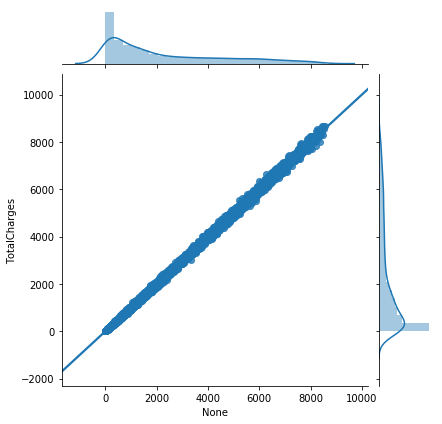

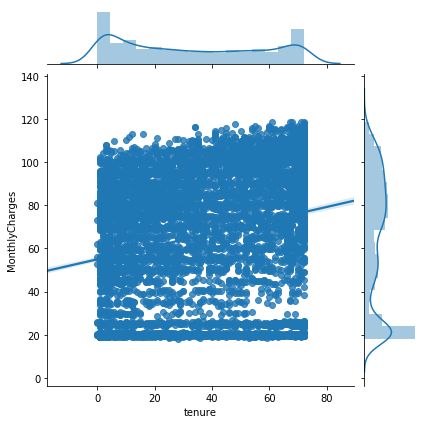

In [11]:
#create a polynomial feature 
features_2_drop = list()
calculated_total = customer.tenure*customer['MonthlyCharges']
sns.jointplot(calculated_total,customer.TotalCharges, kind='reg')
features_2_drop.append('TotalCharges')
categorical_col.remove('TotalCharges')
sns.jointplot(customer.tenure,customer.MonthlyCharges, kind='reg') #seems not obviously related, well keep it.

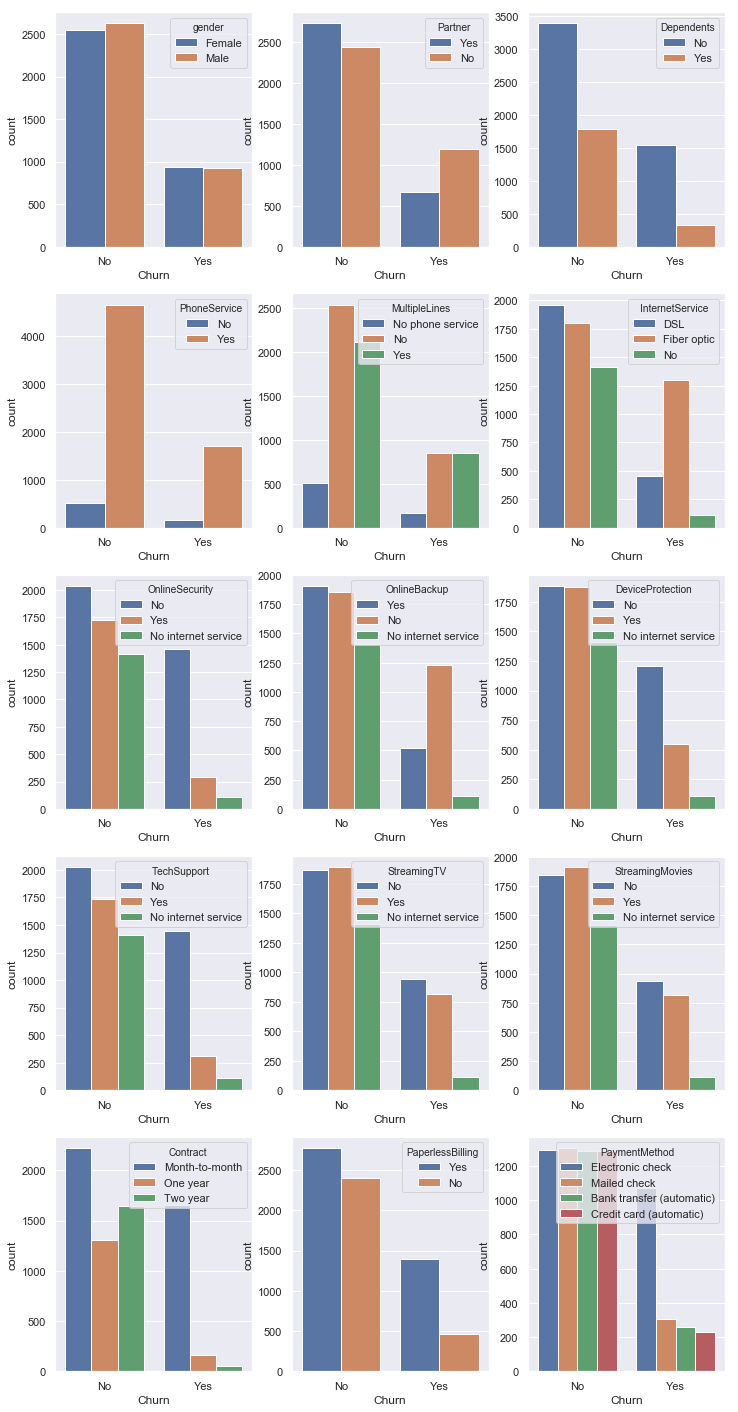

In [7]:
fig , axs = plt.subplots(len(categorical_col)//3,3, figsize=(4*3,5*(len(categorical_col)//3)) )
for i, col in enumerate(categorical_col):
    sns.countplot(x= 'Churn', hue= categorical_col[i],data=customer, ax= axs[i//3][i%3])

## Gender

In [8]:
#male and female almost have identical churn distribution. We can rule out this feature 
features_2_drop.append('gender')
categorical_col.remove('gender')

## Senior

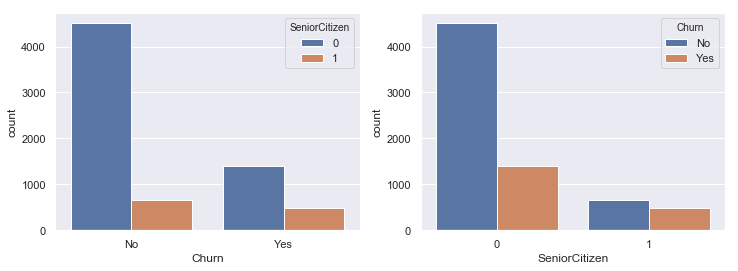

In [9]:
#well missed senior due to it is now int col, add it manually Here
fig , axs = plt.subplots(1,2,figsize=(12,4))
sns.countplot(x= 'Churn', hue='SeniorCitizen' ,data=customer, ax=axs[0])
sns.countplot(x= 'SeniorCitizen', hue='Churn' ,data=customer, ax=axs[1])

## Family structure-Partner + Dependents

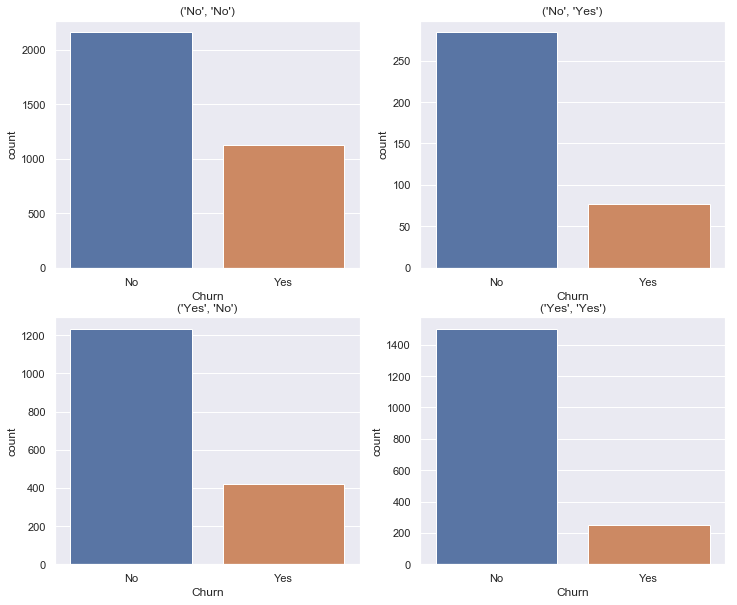

In [10]:
fig , axs = plt.subplots(2,2,figsize=(12,10))
for i,group in enumerate(customer.groupby(['Partner','Dependents'])):
    sns.countplot(x='Churn',data=group[1], ax = axs[i//2][i%2])
    axs[i//2][i%2].set_title(str(group[0]))
    #print(type(group[1]))

In [11]:
#we can see there's pattern. customer whith dependent and partner tend to not churn contrast to customers without dependant and partner
#create a composite feature combine these two features.
customer['family_struct']= customer['Partner']+customer['Dependents']
customer['family_struct']= customer['family_struct'].map({'NoNo':0,'NoYes':1,'YesNo':2,'YesYes':3})
features_2_drop.append('Partner')
features_2_drop.append('Dependents')
categorical_col.remove('Partner')
categorical_col.remove('Dependents')

In [12]:
## from quick distribution view 
#got some points
#1. Streaming TV and steaming Movies almost identifc
#2. phone service is a subset of multipleLines
#3. online security and online backup are closely related
#4. Internet service relate to Online Securoty& online backup?
customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,family_struct
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


## InternetService evaluate

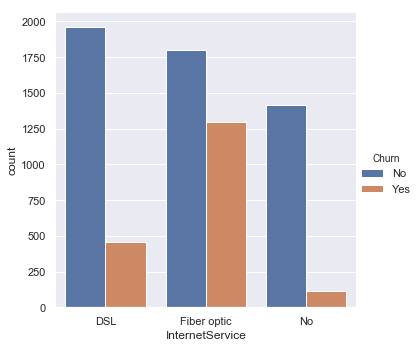

In [13]:
sns.catplot(x='InternetService', hue='Churn', data= customer, kind='count')

### it seems Fiber optic customer are not satisfied for their services
#### This feature retain

## StreamTV and Stream Movies

StreamingTV          StreamingMovies    
No                   No                     2018
                     Yes                     792
No internet service  No internet service    1526
Yes                  No                      767
                     Yes                    1940
Name: gender, dtype: int64


c:\users\sean\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


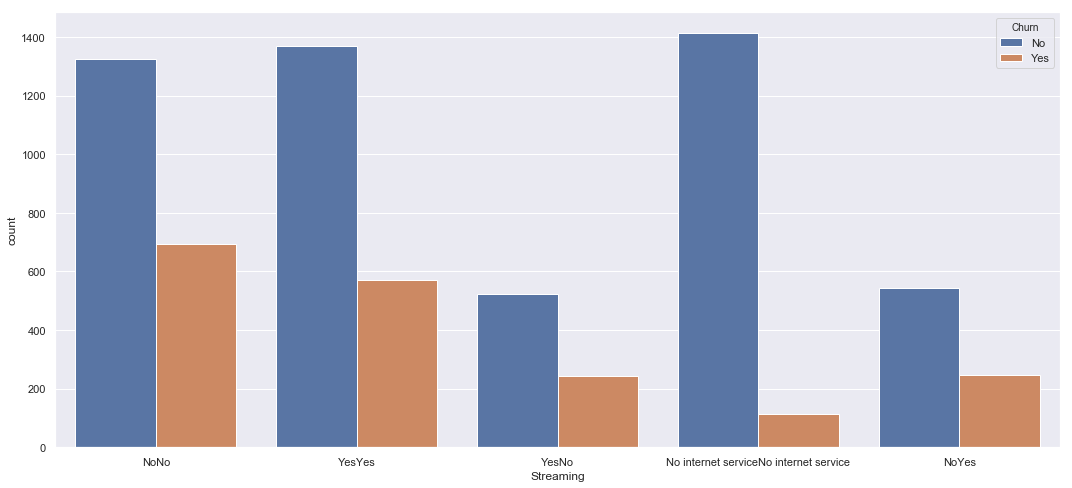

In [14]:
stream = customer.groupby(['StreamingTV','StreamingMovies']).count()
print(stream.gender)
#create for countplot
customer_streamServices = customer[['StreamingTV','StreamingMovies','Churn']]
customer_streamServices['Streaming'] = customer.StreamingTV+customer.StreamingMovies
sns.set(rc={'figure.figsize':(18,8)})
sns.countplot(x='Streaming', hue='Churn',data=customer_streamServices)
#consider NoYes and YesNo counts for over 1500/7043
#these two columns are not closely dependant
customer['Streaming']= customer_streamServices['Streaming'].map({'No internet serviceNo internet service':0,'NoNo':1,'NoYes':2,'YesNo':3,'YesYes':4})
features_2_drop.append('StreamingTV')
features_2_drop.append('StreamingMovies')
categorical_col.remove('StreamingTV')
categorical_col.remove('StreamingMovies')

#### customer with No Internet service tend to not churn
#### all other combinations churn percentage seems no big different

## PhoneService is a subset of MultipleLines

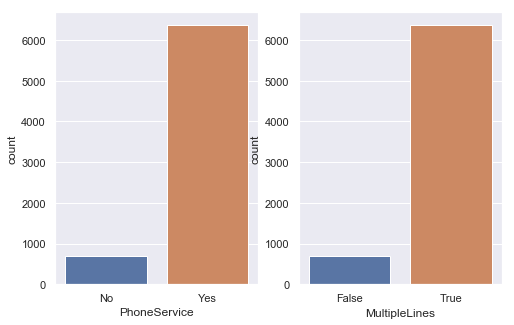

In [12]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(8,5))
sns.countplot(customer.PhoneService, ax=axs[0])
ds = customer['MultipleLines'].isin(['Yes','No'])
sns.countplot(ds, ax=axs[1])
features_2_drop.append('PhoneService')
categorical_col.remove('PhoneService')

#### PhoneService is a subset of MultipleLines. Drop it.

## Finance feature
#### Contract :3/7043
#### PaperlessBilling :2/7043
#### PaymentMethod :4/7043

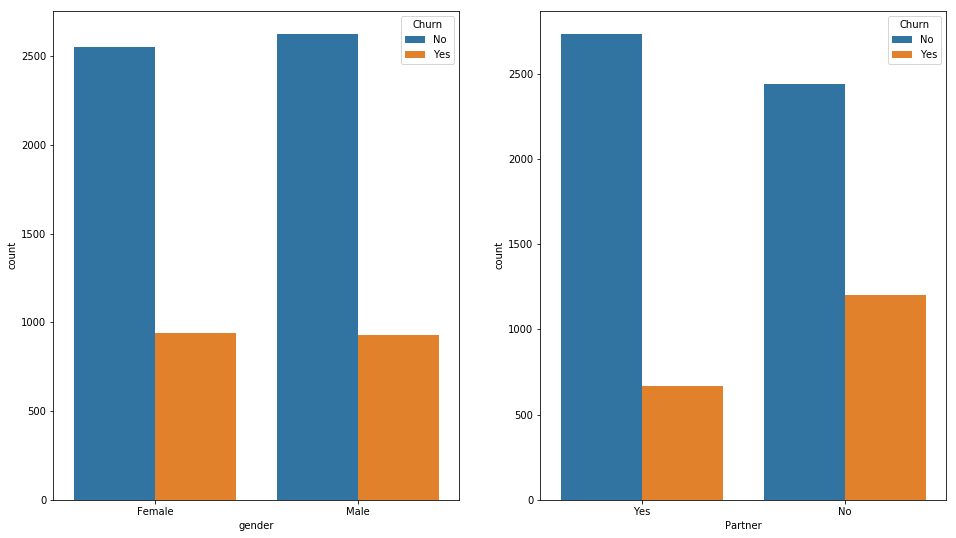

In [17]:
fig, axs2 = plt.subplots(1,2,figsize=(16,9))
sns.countplot(x= 'gender', hue= 'Churn',data=customer, ax=axs2[0])
sns.countplot(x= 'Partner', hue= 'Churn',data=customer, ax=axs2[1])

## It seems No Partner affect customer to not churn 

c:\users\sean\appdata\local\programs\python\python35\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


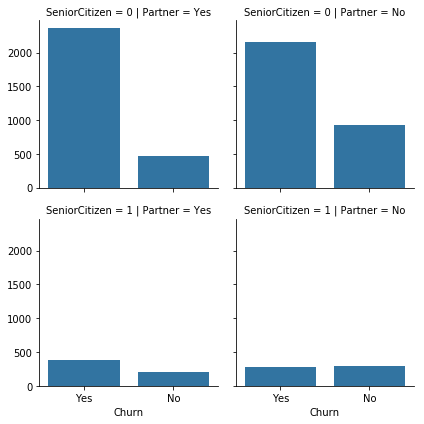

In [14]:
g = sns.FacetGrid(customer, row='SeniorCitizen', col='Partner')
g = g.map(sns.countplot,'Churn')

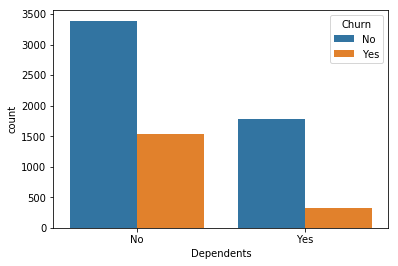

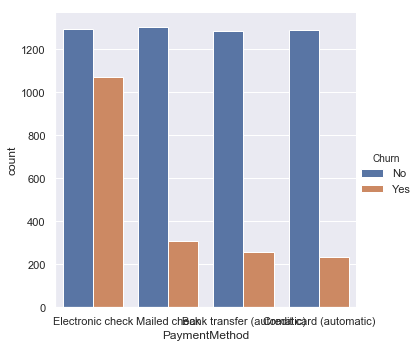

In [15]:
sns.countplot(x= 'Dependents', hue= 'Churn',data=customer)

In [22]:
filtered_customer = customer.drop(features_2_drop,axis=1)
target = customer.Churn
filtered_customer = filtered_customer.drop('Churn',axis=1)
target = target.map({'No':0,'Yes':1})
#filtered_customer = customer

## Do Standard Scaling for numerical cols and one-hot for categorical

In [23]:
#pd.get_dummies(customer)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
filtered_customer[['tenure','MonthlyCharges']] = scaler.fit_transform(filtered_customer[['tenure','MonthlyCharges']])
#rint(customer.head(10))
filtered_customer = pd.get_dummies(filtered_customer)
filtered_customer.head(10)

,SeniorCitizen,tenure,MonthlyCharges,family_struct,Streaming,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,2,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0.066327,-0.259629,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0.514251,-0.746535,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0
4,0,-1.236724,0.197365,0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5,0,-0.992402,1.159546,0,4,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
6,0,-0.422317,0.808907,1,3,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
7,0,-0.910961,-1.163647,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
8,0,-0.177995,1.330711,2,4,0,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
9,0,1.206498,-0.286218,1,1,1,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0


## Test-Train split

In [24]:
#customer.info()
from sklearn.model_selection import train_test_split
trainX, testX,trainY, testY = train_test_split(filtered_customer, target,train_size = 0.8 )

C:\Users\sean\AppData\Roaming\Python\Python35\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Try RandomForest model

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 20,max_depth=10, random_state=0,min_samples_split =5)
clf.fit(trainX, trainY)
clf.score(testX,testY)

0.8112136266855926

## Try Support Vector Machine

In [26]:
from sklearn.svm import SVC
clf2 = SVC()
clf2.fit(trainX, trainY)
clf2.score(testX,testY)

0.8161816891412349